# Loan Classifier

This notebook tells about whether a loan is approved or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

- k-Nearest Neighbour(KNN)
- Decision Tree

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

- Jaccard index
- F1-score

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 


## About Dataset

This dataset is about past loans. The `train_loan_data.csv` data set includes details of 614 customers whose loan are already paid off or defaulted. It includes following fields:

| **Variable**           | **Description**                                      |
|------------------------|------------------------------------------------------|
| **Loan_ID**            | Unique Loan ID                                       |
| **Gender**             | Gender of the applicant (Male / Female)              |
| **Married**            | Applicant married (Y/N)                              |
| **Dependents**         | Number of dependents                                 |
| **Education**          | Education level (Graduate / Under Graduate)          |
| **Self_Employed**      | Self-employed status (Y/N)                           |
| **ApplicantIncome**    | Applicant’s income                                   |
| **CoapplicantIncome**  | Co-applicant’s income                                |
| **LoanAmount**         | Loan amount (in thousands)                           |
| **Loan_Amount_Term**   | Loan repayment term (in months)                      |
| **Credit_History**     | Indicates whether credit history meets guidelines    |
| **Property_Area**      | Property location (Urban / Semi Urban / Rural)       |
| **Loan_Status**        | Loan approved (Y/N) — **Target Variable**            |

In [2]:
train_df = pd.read_csv('train_loan_data.csv')
print(train_df.shape)
train_df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## Let see the data insight
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observations:
- We can see there are total 13 columns including target variable, all of them are self explanatory.
- We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [4]:
############ Count number of Categorical and Numerical Columns ######################
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print("categorical_columns =", categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("numerical_columns =", numerical_columns)

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Analyze values assigned to columns

#### categorical_columns

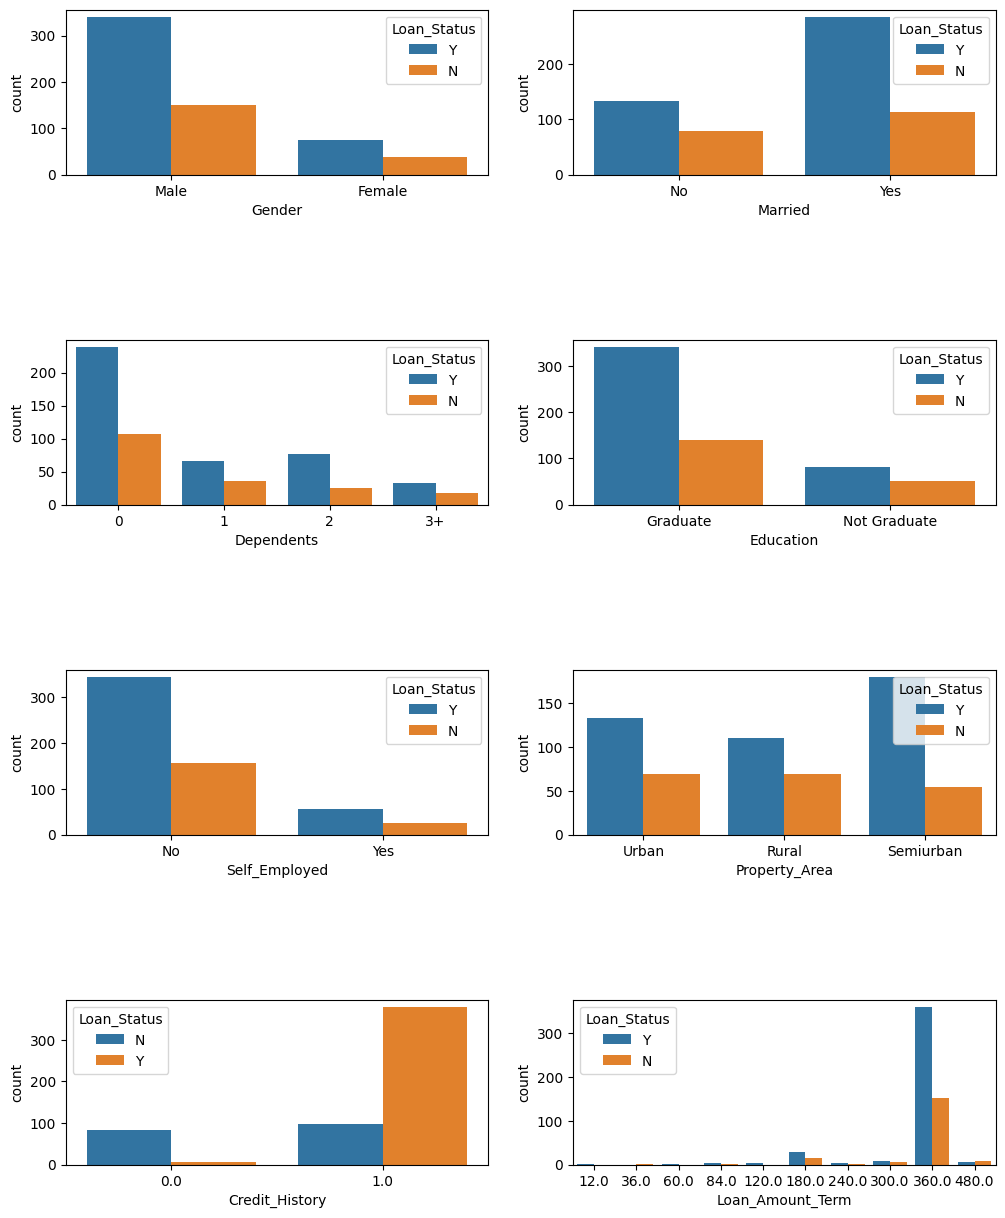

In [5]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

### Plots above convey following things about the dataset:
- Loan Approval Status: About 2/3rd of applicants have been granted loan.
- Sex: There are more Men than Women (approx. 3x)
- Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
- Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
- Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
- Employment: 5/6th of population is not self employed.
- Property Area: More applicants from Semi-urban and also likely to be granted loans.
- Applicant with credit history are far more likely to be accepted.
- Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


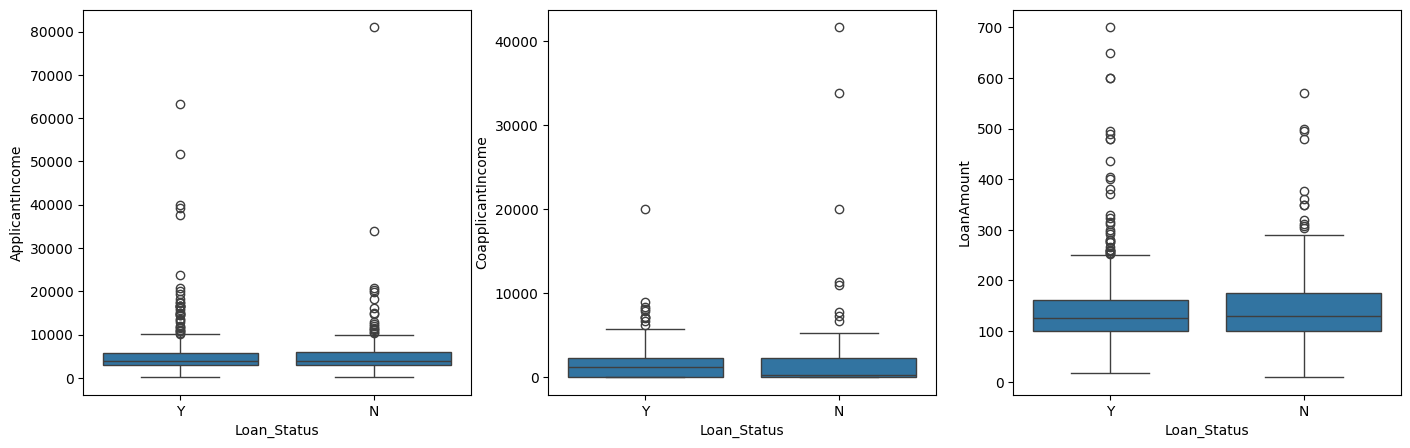

In [6]:

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

## Data Preprocessing

Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

- Encoding Categorical Features.
- Imputing missing values

In [7]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [8]:
## Let see the data insight again
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               592 non-null    float64
 3   Loan_Amount_Term         600 non-null    float64
 4   Credit_History           564 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Dependents_1             614 non-null    bool   
 8   Dependents_2             614 non-null    bool   
 9   Dependents_3+            614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Loan_Status_Y            6

In [9]:
# Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

In [10]:
# Splitting into Train -Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [11]:
# Handling/Imputing Missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

### Model 1: Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, ConfusionMatrixDisplay


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)


### Measure accuracy

In [13]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6454468648996107
Validation Mean Accuracy:  0.7107812822098536


### Observation 

- **Training Accuracy = 1.0 & Training F1 = 1.0**: This means model perfectly memorized the training data means it's learning the training data too well, not generalizing.

- **Validation Accuracy ≈ 0.68 and Validation F1 ≈ 0.66**: If training performance is very high and validation is much lower

So the model is **overfitted**

### Why does a decision tree overfit?

Default DecisionTreeClassifier() has:

- max_depth=None (unlimited depth)
- min_samples_split=2 (can split even tiny nodes)
- min_samples_leaf=1
- criterion='gini'

With no limits, the tree keeps splitting until each leaf contains almost pure labels.That leads to:

- Memorization
- High variance
- Poor generalization

**Apply regularization parameters to prevent overfitting.** 
lets try with max_depth=5, min_samples_leaf=10, min_samples_split=10, We might need to find the accurate value for these fields but for now we can try with that.

In [14]:
tree_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10
)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [15]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8105906313645621
Training Data F1 Score  0.8761651131824234
Validation Mean F1 Score:  0.693415125652729
Validation Mean Accuracy:  0.7596165739022881


In [16]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10
)

tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8292682926829268
Test F1 Score:  0.8839779005524862
Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,22,16,38
True,5,80,85
All,27,96,123


## Summary

**True Positives (TP = 80)** 
- Model correctly predicted loan approved.

**True Negatives (TN = 22)**
- Model correctly predicted loan NOT approved.

**False Positives (FP = 16)**
- Model predicted approved, but it should be not approved. This mistake can cost the bank money → riskier error.

**False Negatives (FN = 5)**
- Model predicted not approved, but actually approved. Less risky for the bank than FP.

### Model 2: K Nearest Neighbor(KNN) 

#### Find the best K

In [17]:
# Classifier implementing the k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score

In [22]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test_imp)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print( "The best accuracy on training data:", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy on training data: 0.6991869918699187 with k= 18


In [19]:
# Train the model
neigh = KNeighborsClassifier(n_neighbors=18).fit(X_train, y_train)
yhat_knn = neigh.predict(X_test_imp)

In [20]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

       False       0.54      0.18      0.27        38
        True       0.72      0.93      0.81        85

    accuracy                           0.70       123
   macro avg       0.63      0.56      0.54       123
weighted avg       0.66      0.70      0.64       123



In [21]:
print("Test Accuracy: ",accuracy_score(y_test,yhat_knn))
print("Test F1 Score: ",f1_score(y_test,yhat_knn))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, yhat_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6991869918699187
Test F1 Score:  0.8102564102564103
Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,7,31,38
True,6,79,85
All,13,110,123


## Summary 
**True Positives (TP = 79)**
- Model correctly predicted loan approved (True class).

**True Negatives (TN = 7)**
- Model correctly predicted loan not approved (False class).

**False Positives (FP = 31)**
- Model predicted approved, but actually not approved. **These are risky mistakes for a bank because it approves loans that should NOT be approved.**


**False Negatives (FN = 6)**
- Model predicted not approved, but actually approved. **Less risky for a bank, but still not ideal.**

**Model does well at identifying approved loans, but struggles to correctly identify rejected loans.**